In [1]:
import sys
# not best practice, but makes it easier to import from subdirectory
sys.path.insert(0, './lib')
sys.path.insert(0, './archive')

import experiment as exp
import plot

%load_ext autoreload
%autoreload 2

Invoking __init__.py for NDNT.utils


In [2]:
e = exp.load('exp_multiple_models', experiment_location='experiments', datadir='./Mdata')

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/exp_multiple_models/exp_params.pickle'

In [54]:
e.trials

,num_filters,expt,kernel_height,reg_vals,modelstr,name,trial,mean_LLs
0,16,expt04,5,"{'d2xt': 0.01, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim0,<experiment.Trial object at 0x7f45599012e0>,0.387204
0,16,expt04+expt05,5,"{'d2xt': 0.01, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim1,<experiment.Trial object at 0x7f4559a30100>,0.179294
0,16,expt04,5,"{'d2xt': 0.05, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim16,<experiment.Trial object at 0x7f4559901130>,0.375183
0,16,expt04+expt05,5,"{'d2xt': 0.05, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim17,<experiment.Trial object at 0x7f4559cf39d0>,0.089433
0,16,expt04+expt05+expt06,5,"{'d2xt': 0.05, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim18,<experiment.Trial object at 0x7f45598b0910>,0.045480
0,16,expt04+expt05+expt06+expt07,5,"{'d2xt': 0.05, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim19,<experiment.Trial object at 0x7f4559d71e50>,-0.024057
0,16,expt04+expt05+expt06,5,"{'d2xt': 0.01, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim2,<experiment.Trial object at 0x7f4559a24550>,0.068619
0,16,expt04+expt05+expt06+expt07,5,"{'d2xt': 0.01, 'l1': 0.0001, 'center': 0.01, '...",cnim,cnim3,<experiment.Trial object at 0x7f4559a30e80>,0.045936
0,16,expt04,5,"{'d2xt': 0.05, 'l1': 0.0001, 'center': 0.01, '...",cnim_scaffold,cnim_scaffold20,<experiment.Trial object at 0x7f455985f4c0>,0.392278
0,16,expt04+expt05,5,"{'d2xt': 0.05, 'l1': 0.0001, 'center': 0.01, '...",cnim_scaffold,cnim_scaffold21,<experiment.Trial object at 0x7f4559d1cc40>,-0.007341


(21, 10, 16) --> (16, 10, 21)
(16, 36, 11) --> (11, 36, 16)


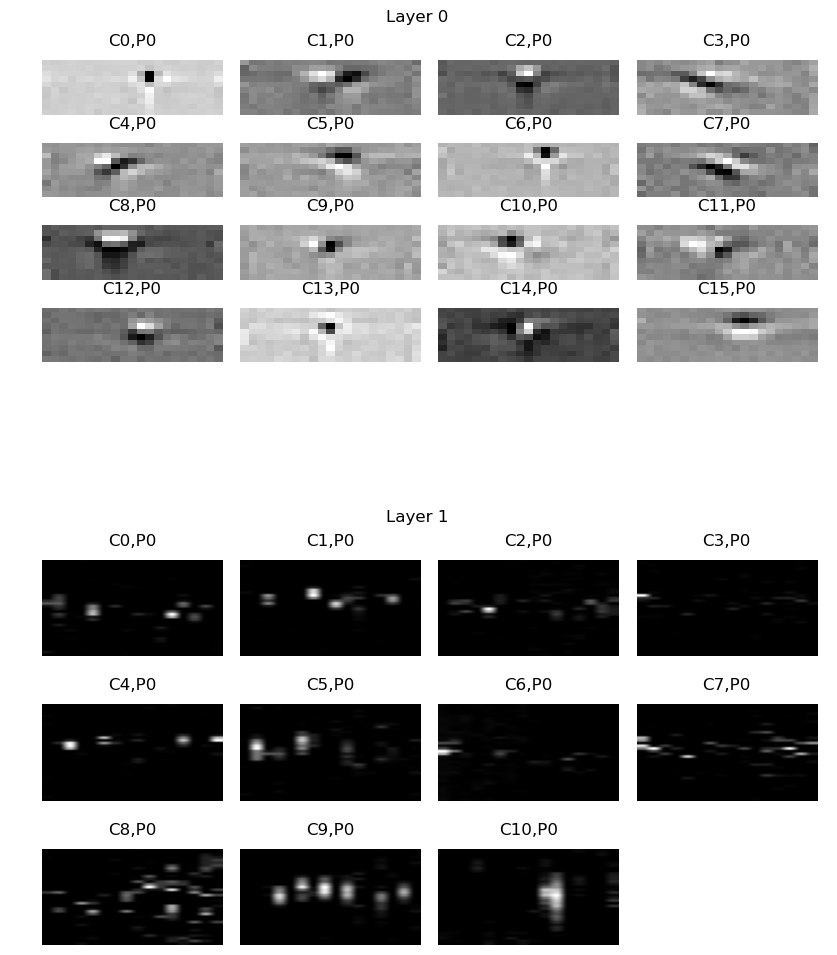

In [16]:
# plot predictions
model = e.trials_where(name='cnim0')[0].model
plot.plot_network_weights(model.networks[0], wspace=0.1, hspace=0.5, max_cols=4, figsize=(10,10))

In [27]:
import torch
import numpy as np

trial = e.trials_where(name='cnim0')[0]
model = trial.model
inps = trial.dataset.stim[:100]

In [31]:
# get all the outputs
# TODO: use the NDN, not the model object directly
prev_output = inps
all_outputs = []
for n in range(len(model.NDN.networks)):
    for l in range(len(model.NDN.networks[n].layers)):
        z = model.NDN.networks[n].layers[l](prev_output)
        # TODO: not entirely sure if I need to detach twice
        z_cpu = torch.tensor(np.array([z_i.detach().numpy() for z_i in z]))
        all_outputs.append(z_cpu.numpy())
        print(prev_output.shape, '-->', z_cpu.shape)
        prev_output = z_cpu


layers = []
for n in range(len(model.NDN.networks)):
    for l in range(len(model.NDN.networks[n].layers)):
        layer = model.NDN.networks[n].layers[l].get_weights()
        layers.append(layer)

torch.Size([100, 360]) --> torch.Size([100, 576])
torch.Size([100, 576]) --> torch.Size([100, 11])


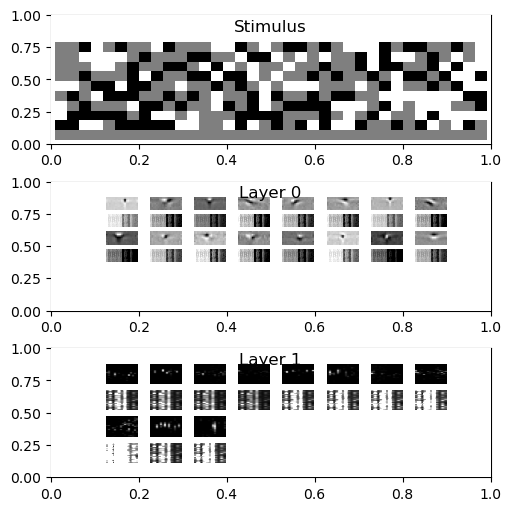

In [34]:
# TODO: get this working again with the new interface
# TODO: add in plotting robs functionality
figs = plot.render_network(inp=inps[0], stim_dims=trial.dataset.stim_dims, outputs=all_outputs, layers=layers)

In [40]:
import predict

res = predict.predict(model, dataset=trial.dataset)

In [39]:
res.pred[:,0]

array([0.02886181, 0.04395458, 0.05666052, ..., 0.67438394, 0.26300707,
       0.03951599], dtype=float32)

In [49]:
trial.dataset.stim[0].shape, trial.dataset.robs[0].shape, trial.dataset.stim_dims

(torch.Size([360]), torch.Size([11]), [1, 36, 1, 10])

In [47]:
plot.simulate(model=model,
              dataset=trial.dataset,
              timestep=10)

IndexError: list index out of range